In [108]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [109]:
X=np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

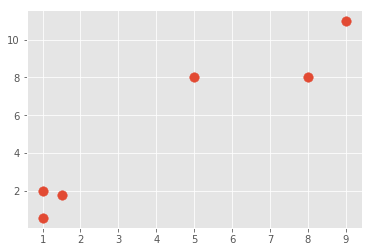

In [110]:
plt.scatter(X[:,0], X[:,1], s=90)
plt.show()

In [111]:
colors = 10*["g","r","c","b","k"]

In [112]:
f= [1,2,3,0]
v=f.index(min(f))
print(v)

3


In [121]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):#tol and max_iter are two restrictions made to minimize procedure
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self,data):
        self.create={}
        for i in range(self.k):
            self.create[i]=[]
        for i in range(self.k):
            self.create[i].append(data[i])
        print(self.create)   
        #centroid dict
        self.centroids = {}# x cluster ke x centroid
        # since k=2 we will select first two points from the data and we will declare that as a centroid
        for i in range(self.k):
            self.centroids[i] = data[i]# 0 and 1 ka centroid table ke liye
           # self.create[i].append(data[i])
            print(self.centroids[i],"---")
        print(self.create)

        # we will run this loop for 300 times (300 iteration)
        for i in range(self.max_iter):
            self.classifications = {}  #{0: [], 1: []}

            for i in range(self.k):
                self.classifications[i] = []#multiple values ko hold karne list chahiye

            for featureset in data:  #finding distance from centroid , finding mini value , putting them in classification
                
                distances=[np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances)) #find the index of the min distan
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)#kyunki alag centroid mein daalna hai to compare
          
            for classification in self.classifications:

                self.centroids[classification] = np.average(self.classifications[classification],axis=0)#naya centroid
                self.create[classification].append(np.average(self.classifications[classification],axis=0))
                #print(self.centroids)
            optimized = True
        
            for c in self.centroids:
                original_centroid = prev_centroids[c]#??
                current_centroid = self.centroids[c]
                
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) < self.tol:
                       break
        print(self.centroids)    
        def predict(self,data):
            
            distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            return classification


      

In [122]:
clf=K_Means()
clf.fit(X)



{0: [array([1., 2.])], 1: [array([1.5, 1.8])]}
[1. 2.] ---
[1.5 1.8] ---
{0: [array([1., 2.])], 1: [array([1.5, 1.8])]}
{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}


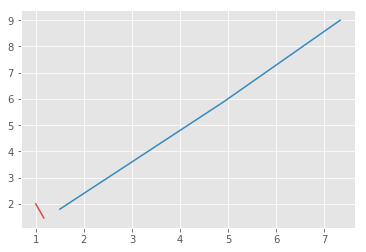

In [123]:
for i in range(clf.k):
    x,y=[],[]
    for j in range(len(clf.create[i])):
               x.append(clf.create[i][j][0])
               y.append(clf.create[i][j][1])
    plt.plot(x,y)

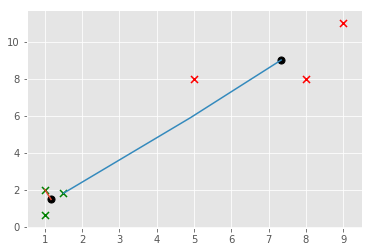

In [133]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=1)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=1)
        
for i in range(clf.k):
    x,y=[],[]
    for j in range(len(clf.create[i])):
               x.append(clf.create[i][j][0])
               y.append(clf.create[i][j][1])
    plt.plot(x,y)


In [125]:
plt.show()

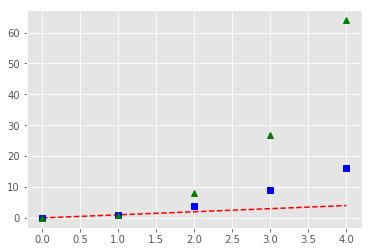

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 1)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()